# Sales Analysis

This project aims to analyze sales data to extract meaningful market and business insights. The goal is to answer key business questions that help identify trends, customer behavior, and sales performance.

#### Data Overview

The dataset consists of sales transactions with the following columns:

- Order ID: Unique identifier for each order.
- Product: The name of the product purchased.
- Quantity Ordered: The number of units ordered.
- Price Each: The price per unit of the product.
- Order Date: The date and time of the order.
- Purchase Address: The delivery address for the order.
- Month: The month in which the order was placed.
- Sales: The total sales amount for each order.
- City: The city where the order was placed.
- Hour: The hour of the day when the order was placed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

## 1. Load the dataset

In [2]:
file_path = 'Sales Data.csv'  # Ensure the file is in the same directory as the notebook or provide the full path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB

Summary Statistics:
          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.38

## 2. Data Cleaning

In [4]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Remove 'Unnamed: 0' column if it exists
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Ensure 'Quantity Ordered' and 'Price Each' are positive
df = df[(df['Quantity Ordered'] > 0) & (df['Price Each'] > 0)]

# Verify and correct 'Sales' column (should be Quantity Ordered * Price Each)
df['Computed Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Sales'] = df['Computed Sales']  # Overwrite existing column if necessary
df.drop(columns=['Computed Sales'], inplace=True)

# Drop rows with missing values if any exist
df.dropna(inplace=True)

# Display summary after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 15.6+ MB
None


## 3. Explore the Data

In [5]:
print(df.describe())

            Order ID  Quantity Ordered     Price Each  \
count  185686.000000     185686.000000  185686.000000   
mean   230411.376227          1.124544     184.519255   
min    141234.000000          1.000000       2.990000   
25%    185833.250000          1.000000      11.950000   
50%    230354.500000          1.000000      14.950000   
75%    275028.750000          1.000000     150.000000   
max    319670.000000          9.000000    1700.000000   
std     51511.717183          0.443069     332.843838   

                          Order Date          Month          Sales  \
count                         185686  185686.000000  185686.000000   
mean   2019-07-18 21:32:06.298051328       7.058653     185.611936   
min              2019-01-01 03:07:00       1.000000       2.990000   
25%              2019-04-16 20:55:15       4.000000      11.950000   
50%              2019-07-17 20:11:00       7.000000      14.950000   
75%              2019-10-26 08:00:00      10.000000     150.000000

#### Key Findings

- Most customers order only 1 item per transaction.
- There’s a wide range of product prices, from $2.99 to $1,700.
- The average order generates around $185 in sales.
- Peak purchasing hours are in the afternoon (~2-3 PM).
- Sales fluctuate by month—possibly due to seasonal demand.

### a. Sales Trends & Performance

To understand which product categories drive the most revenue.

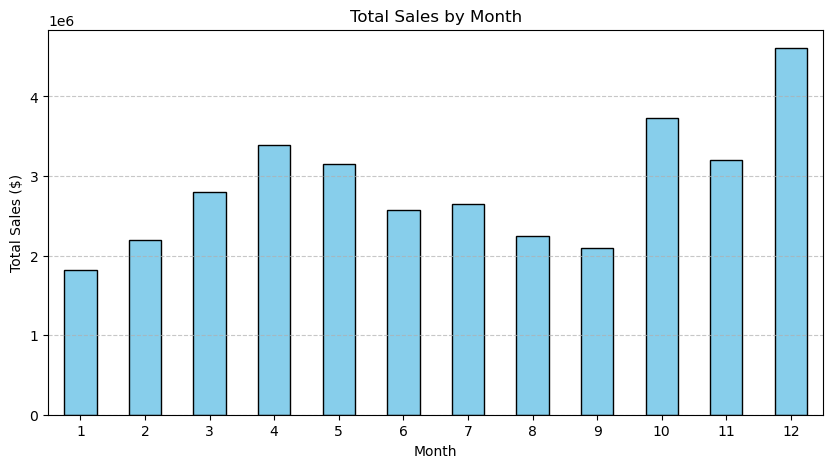

In [6]:
# (1) Which month had the highest sales revenue?
# Group by 'Month' and sum 'Sales'
monthly_sales = df.groupby("Month")["Sales"].sum()

# Plot monthly sales
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Month")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

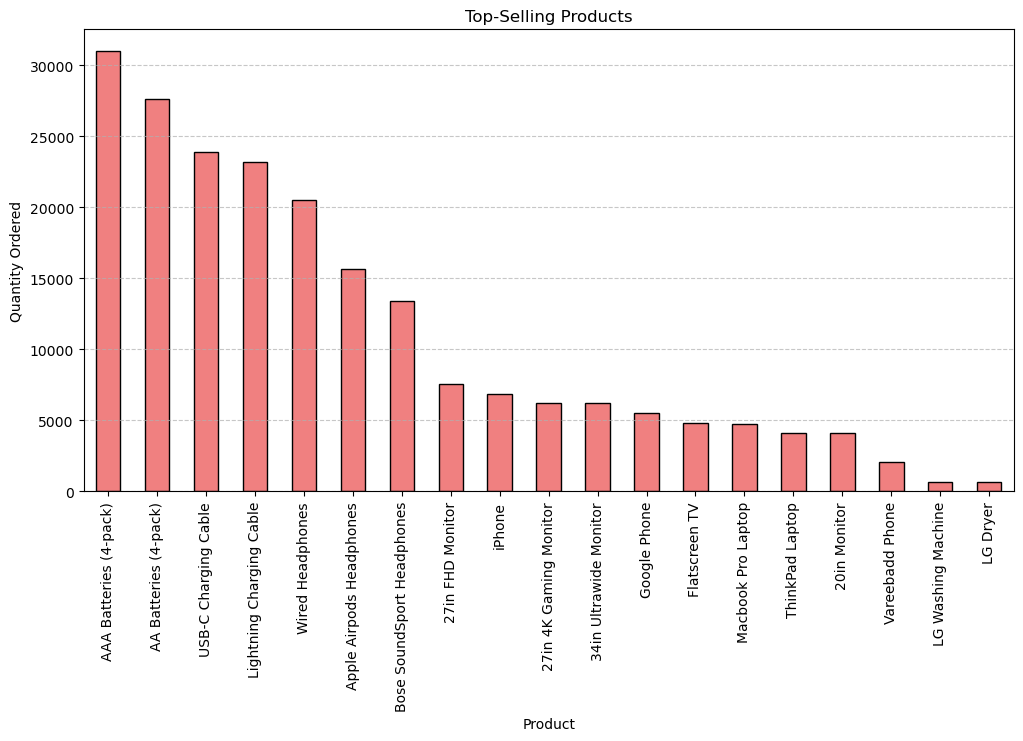

In [7]:
# (2) What are the top-selling products?
# Group by 'Product' and sum 'Quantity Ordered'
top_products = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

# Plot top-selling products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Top-Selling Products")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

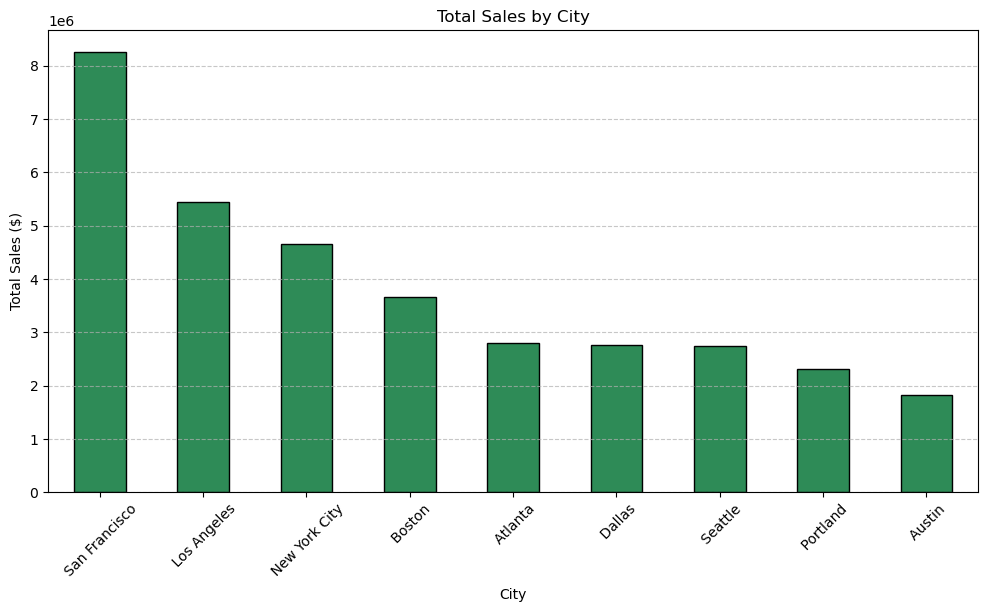

In [8]:
# (3) Which city had the highest sales?
# Group by 'City' and sum 'Sales'
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

# Plot sales by city
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='seagreen', edgecolor='black')
plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by City")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

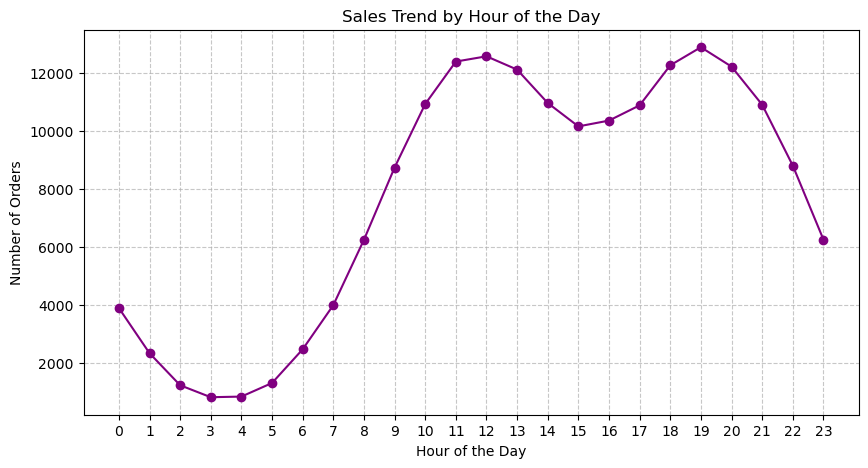

In [9]:
# (4) How do sales vary by hour of the day?
# Group by 'Hour' and count the number of orders
hourly_orders = df.groupby("Hour")["Order ID"].count()

# Plot hourly order count
plt.figure(figsize=(10, 5))
hourly_orders.plot(kind='line', marker='o', color='purple')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Sales Trend by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# (5) What are the peak hours for orders?
# Find the peak order hour
peak_hour = hourly_orders.idxmax()
peak_orders = hourly_orders.max()
print(f"Peak Hour for Orders: {peak_hour}:00 with {peak_orders} orders")

Peak Hour for Orders: 19:00 with 12886 orders


### b. Customer Behavior & Purchasing Patterns

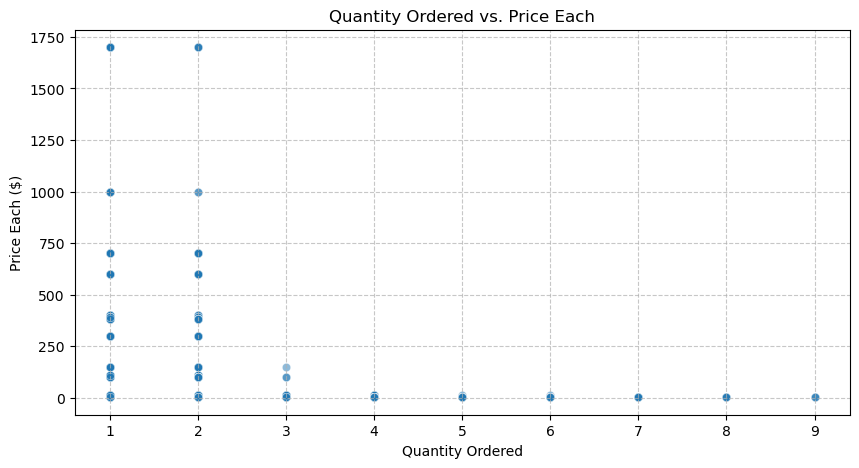

In [12]:
# Extract Day of the Week from 'Order Date'
df['Day of Week'] = df['Order Date'].dt.day_name()

# (1) Do customers prefer purchasing expensive items in bulk or individually?
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Quantity Ordered", y="Price Each", alpha=0.5)
plt.xlabel("Quantity Ordered")
plt.ylabel("Price Each ($)")
plt.title("Quantity Ordered vs. Price Each")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
# (2) Are there certain products often purchased together?
df_dup = df[df.duplicated(subset=['Order ID'], keep=False)]  # Get duplicate Order IDs (multiple items in same order)
df_dup = df_dup.groupby("Order ID")["Product"].apply(lambda x: ', '.join(x)).reset_index()  # Group by Order ID

# Count frequent product combinations
counter = Counter()
for products in df_dup["Product"]:
    product_list = products.split(', ')
    for combo in combinations(product_list, 2):  # Find pairs of products bought together
        counter[combo] += 1

# Display the 10 most common product pairs
common_pairs = counter.most_common(10)
for pair, count in common_pairs:
    print(f"{pair} - {count} times bought together")

('iPhone', 'Lightning Charging Cable') - 1002 times bought together
('Google Phone', 'USB-C Charging Cable') - 985 times bought together
('iPhone', 'Wired Headphones') - 447 times bought together
('Google Phone', 'Wired Headphones') - 413 times bought together
('Vareebadd Phone', 'USB-C Charging Cable') - 361 times bought together
('iPhone', 'Apple Airpods Headphones') - 360 times bought together
('Google Phone', 'Bose SoundSport Headphones') - 220 times bought together
('USB-C Charging Cable', 'Wired Headphones') - 159 times bought together
('Vareebadd Phone', 'Wired Headphones') - 143 times bought together
('Lightning Charging Cable', 'Wired Headphones') - 92 times bought together


### Top 10 Most Common Product Pairs

#### Interpretation:

- Charging Accessories: The pairing of phones (iPhone, Google Phone, Vareebadd Phone) with charging cables (USB-C, Lightning) is a recurring theme, showing that people are often buying the necessary accessories when purchasing a phone.
- Headphones: Wired headphones and wireless headphones (like Apple Airpods and Bose SoundSport) appear frequently in combinations with phones, reflecting the demand for audio products along with mobile devices.
- Product Compatibility: These common product combinations often indicate that customers prefer purchasing compatible products (e.g., phones with their respective charging cables, headphones with their phones).

#### Business Insights:

- Cross-selling opportunities: If you are involved in sales or marketing, you might want to consider promoting product bundles that include these commonly purchased pairs (e.g., iPhone with Lightning Charging Cable or Apple Airpods).
- Customer Preferences: There seems to be a strong preference for wireless headphones (like Airpods) with smartphones, suggesting higher-end customers might be targeted with premium accessories.
- Accessory-Based Marketing: Focusing on charging accessories alongside phones could be an effective strategy, especially since people often need those accessories in addition to their phones.

<Figure size 1400x700 with 0 Axes>

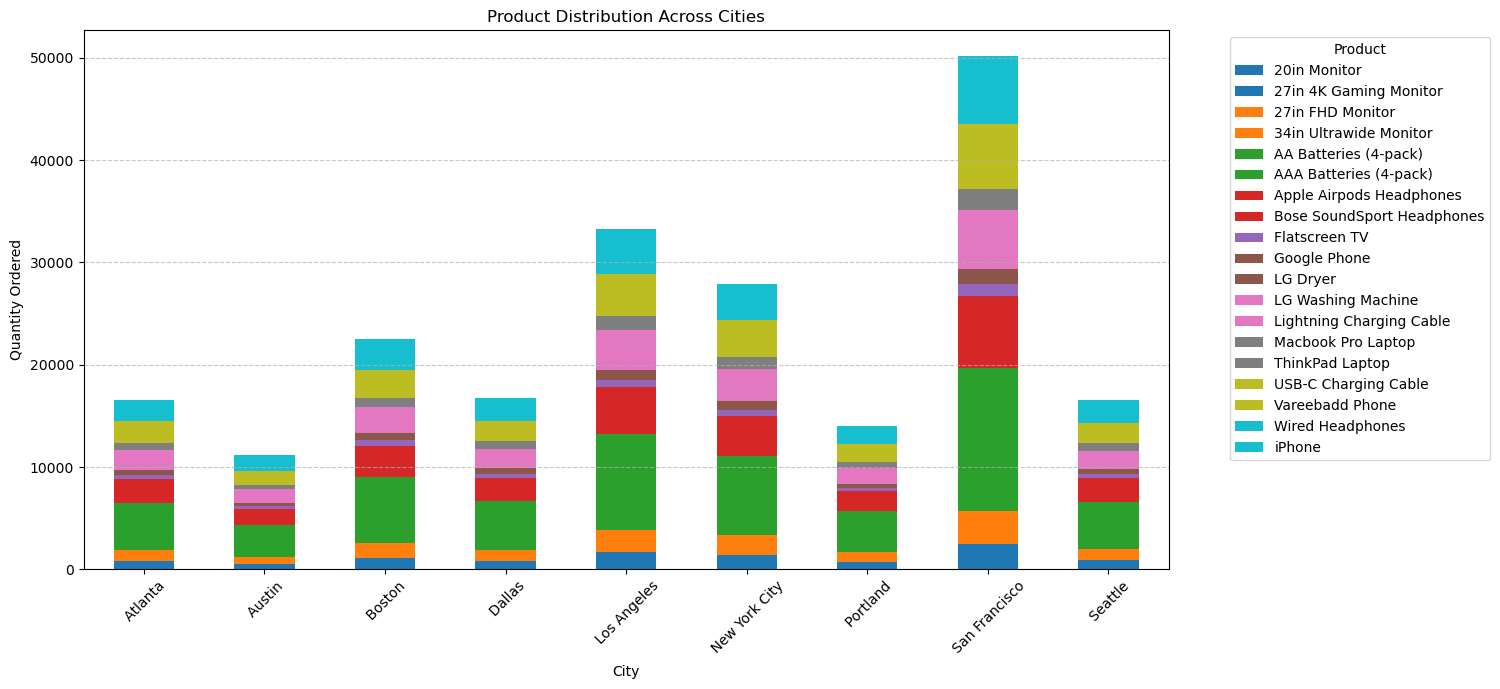

In [14]:
# (3) Does location influence the type of product purchased?
product_city = df.groupby(["City", "Product"])["Quantity Ordered"].sum().unstack()

# Plot product distribution by city
plt.figure(figsize=(14, 7))
product_city.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab10")
plt.xlabel("City")
plt.ylabel("Quantity Ordered")
plt.title("Product Distribution Across Cities")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

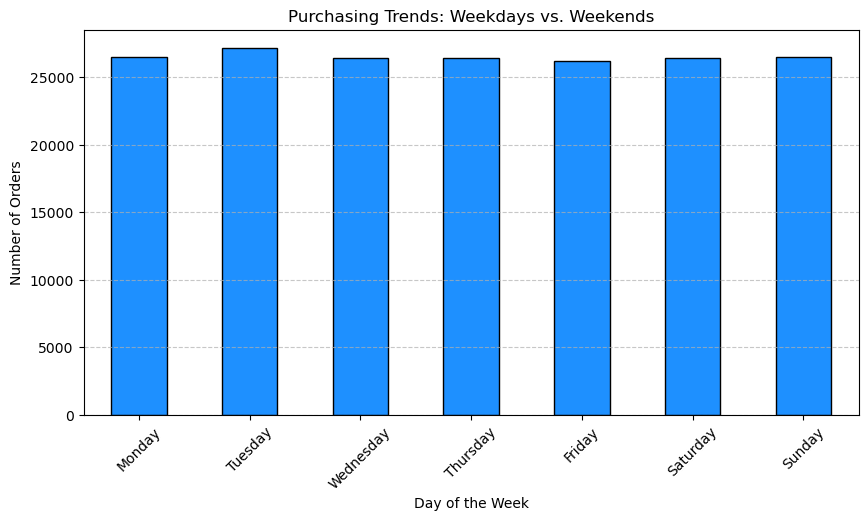

Total Orders on Weekends: 52971
Total Orders on Weekdays: 132715


In [15]:
# (4) Do people tend to buy more during weekends or weekdays?
day_order_counts = df.groupby("Day of Week")["Order ID"].count()

# Reorder the days correctly
day_order_counts = day_order_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot orders by day of the week
plt.figure(figsize=(10, 5))
day_order_counts.plot(kind="bar", color="dodgerblue", edgecolor="black")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Purchasing Trends: Weekdays vs. Weekends")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check weekend vs. weekday purchasing
weekend_sales = day_order_counts.loc[["Saturday", "Sunday"]].sum()
weekday_sales = day_order_counts.sum() - weekend_sales
print(f"Total Orders on Weekends: {weekend_sales}")
print(f"Total Orders on Weekdays: {weekday_sales}")

## c. Market & Business Insights

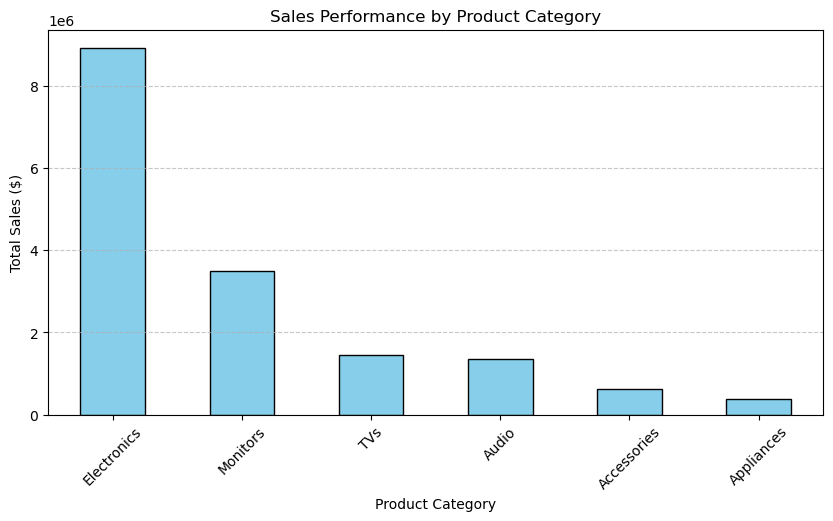

In [17]:
# (1) How do different product categories perform?
# Define product categories manually (adjust as needed)
categories = {
    "iPhone": "Electronics", "Macbook Pro": "Electronics", "ThinkPad Laptop": "Electronics",
    "USB-C Charging Cable": "Accessories", "Lightning Charging Cable": "Accessories",
    "Bose SoundSport Headphones": "Audio", "Apple Airpods": "Audio",
    "27in FHD Monitor": "Monitors", "34in Ultrawide Monitor": "Monitors",
    "Flatscreen TV": "TVs", "LG Dryer": "Appliances", "Washing Machine": "Appliances"
}

df["Category"] = df["Product"].map(categories)

# Group sales by category
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(10, 5))
category_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.title("Sales Performance by Product Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

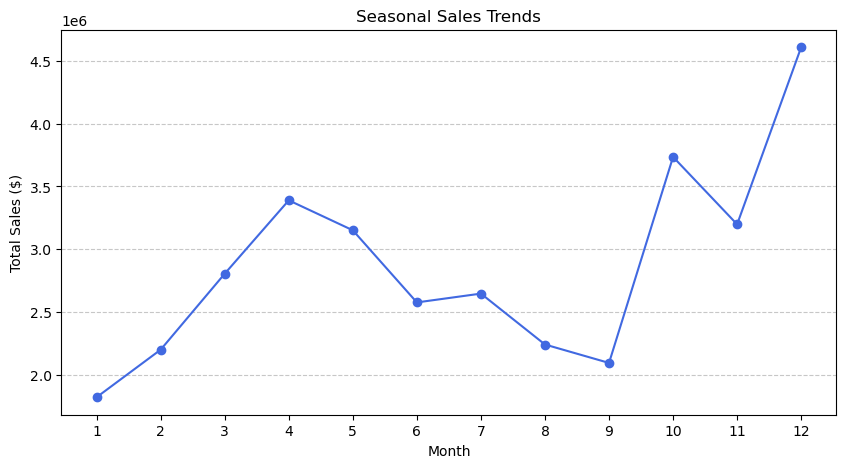

In [18]:
# (2) Are there seasonal trends in product sales?
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="o", color="royalblue", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Seasonal Sales Trends")
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_5916\2420838474.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = df.groupby("Price Range")["Sales"].sum()


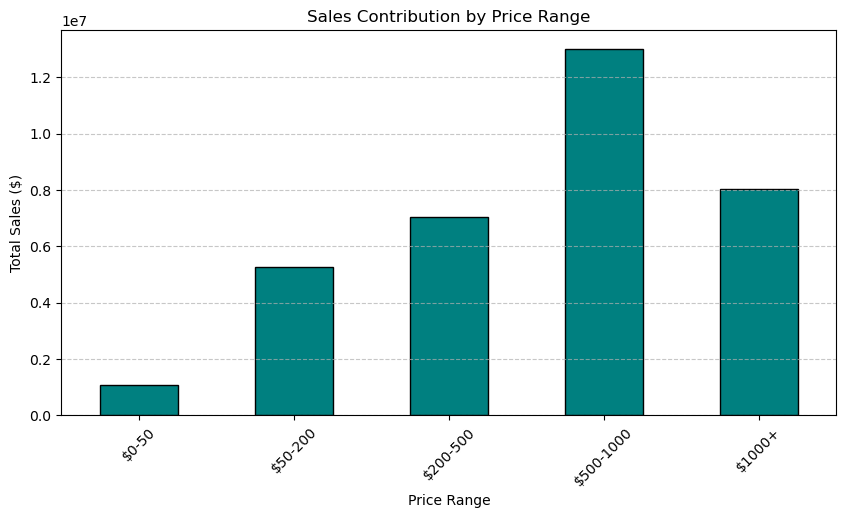

In [19]:
# (3) Which price range contributes the most to revenue?
price_bins = [0, 50, 200, 500, 1000, 5000]
price_labels = ["$0-50", "$50-200", "$200-500", "$500-1000", "$1000+"]

df["Price Range"] = pd.cut(df["Price Each"], bins=price_bins, labels=price_labels)

price_range_sales = df.groupby("Price Range")["Sales"].sum()

plt.figure(figsize=(10, 5))
price_range_sales.plot(kind="bar", color="teal", edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("Total Sales ($)")
plt.title("Sales Contribution by Price Range")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

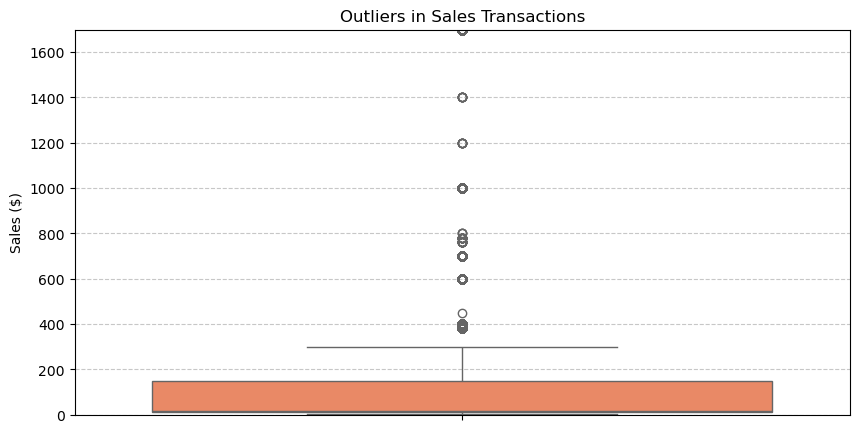

Number of high sales outliers: 6
Number of low sales outliers: 0


In [20]:
# (4) Are there any outliers in sales transactions?
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y="Sales", color="coral")
plt.ylim(0, df["Sales"].quantile(0.99))  # Exclude extreme outliers
plt.ylabel("Sales ($)")
plt.title("Outliers in Sales Transactions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identifying extreme values
high_outliers = df[df["Sales"] > df["Sales"].quantile(0.99)]
low_outliers = df[df["Sales"] < df["Sales"].quantile(0.01)]

print(f"Number of high sales outliers: {len(high_outliers)}")
print(f"Number of low sales outliers: {len(low_outliers)}")

In [21]:
# (5) What is the Average Order Value (AOV)?
aov = df.groupby("Order ID")["Sales"].sum().mean()
print(f"Average Order Value (AOV): ${aov:.2f}")

Average Order Value (AOV): $193.15


In [22]:
# (6) How many unique customers are there based on Purchase Address?
unique_customers = df["Purchase Address"].nunique()
print(f"Estimated Unique Customers: {unique_customers}")

Estimated Unique Customers: 140787


## Conclusion

1. Customer Purchasing Behavior:
- The majority of customers tend to purchase only one item per transaction, which suggests a preference for individual purchases rather than bulk buying.
- There is a wide range of product prices, with the highest prices reaching up to $1,700. Despite this variation, the average order generates approximately $185 in sales, indicating a healthy but diverse pricing structure in the product catalog.
- Customers tend to buy products in the afternoon, particularly around 2-3 PM, and the peak hour for orders occurs at 7 PM, with over 12,000 orders placed at this time. This suggests a peak in customer activity during the evening, which could be leveraged for targeted marketing campaigns or special offers during these hours.

2. Sales Trends and Seasonal Demand:
- Sales fluctuate by month, likely driven by seasonal demand patterns. This fluctuation provides an opportunity for businesses to anticipate high and low-demand periods, enabling more effective inventory and marketing strategies. The peak sales periods could align with holidays or specific promotional periods, which should be further investigated.

3. Product Pairings and Cross-Selling Opportunities:
- Common product pairings, particularly in the realm of charging accessories and headphones, highlight a strong demand for complementary products. Customers often buy phones alongside their necessary charging cables, as well as headphones (both wired and wireless). These insights can inform cross-selling strategies by bundling related products, such as offering a discount on headphones when purchasing a phone or vice versa.

4. Sales Performance and Outliers:
- The analysis identified 6 high sales outliers but no low sales outliers, suggesting that while most sales are in line with average order values, there are some exceptional transactions worth exploring. These outliers could represent large corporate purchases or special promotions that generate significant revenue.

5. Customer Base and Purchase Behavior:
- There are an estimated 140,787 unique customers in the dataset, and sales activity shows a notable distinction between weekend and weekday orders. While weekdays account for the majority of orders, weekend sales still represent a substantial portion, with over 52,000 orders. This suggests that customers may have more flexibility to shop during weekends, which could be an opportunity for tailored weekend promotions.